In [14]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")  ##this is to supress the img loading warning from pyplot (more than 20)

In [3]:
data = pd.read_csv("Images.csv",sep='\t')

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


[ WARN:0@1327.489] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('Images/SD_out/girlinshorts.jpeg'): can't open/read file: check file path/integrity


TypeError: 'NoneType' object is not subscriptable

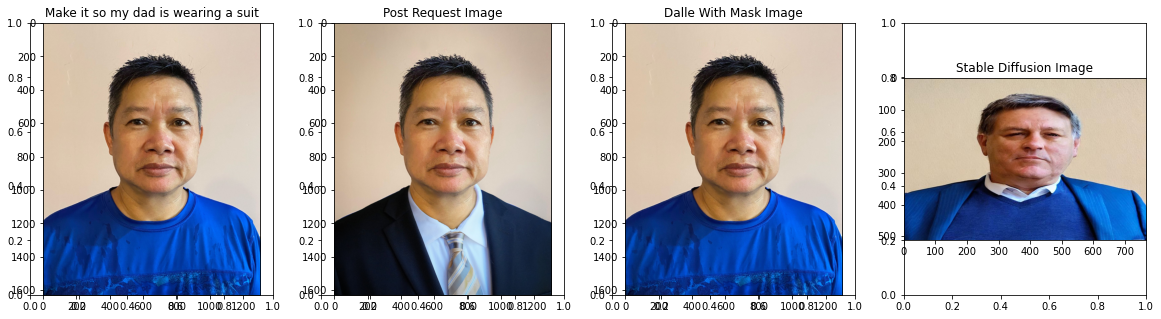

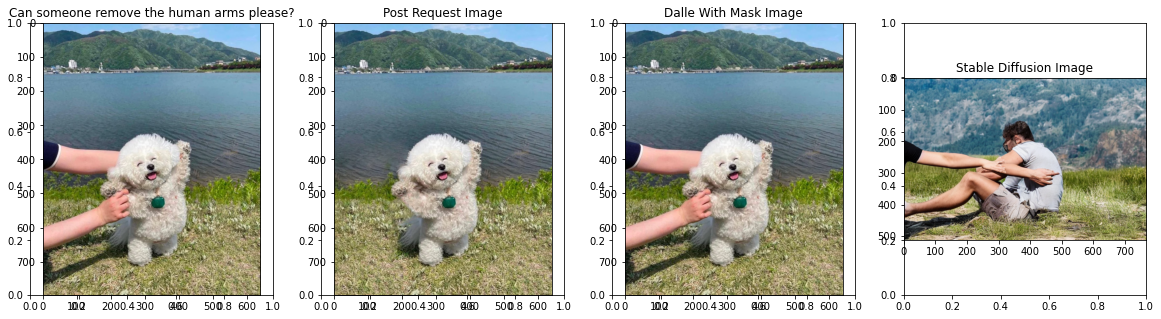

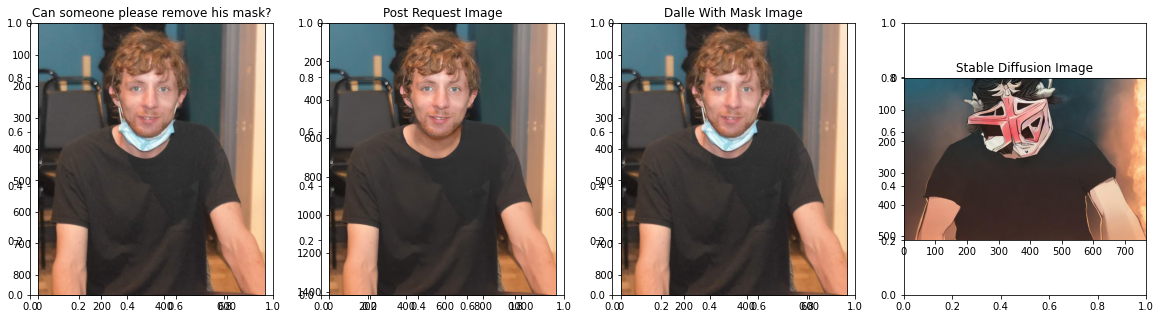

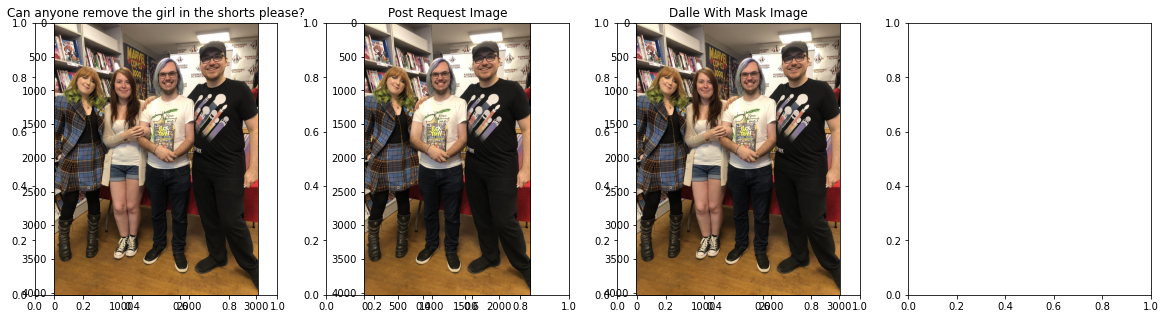

In [27]:
##file structure prefixes
pre_prefix = 'Images/PreRequest/'
post_prefix = 'Images/PostRequest/'
dalle_prefix = ''
sd_prefix = 'Images/SD_out/'

#compile image filenames
request_text = data['request_text'].values.tolist()
input_images = [pre_prefix + i for i in data['pre_request_file_name'].values]
post_images = [post_prefix + i for i in data['post_request_file_name'].values]
dalle_images = input_images
sd_images = [sd_prefix + i for i in data['sd_file_name'].values]
img_list = list(zip(request_text,input_images,post_images,dalle_images,sd_images))

#display

for img in img_list:
    request = img[0]  #prints the photoshop request
    
    rows = 1
    columns = 4
    
    fig, axes = plt.subplots(rows,columns, figsize = (20,5))
    
    for i,im in enumerate(img[1:]):
        
        this_img = cv2.imread(im)[:,:,::-1]
        which = fig.add_subplot(rows, columns, i+1)
        
        if i == 0:
            which.title.set_text(request) ##put the request above the first image
        if i == 1:
            which.title.set_text('Post Request Image')
        if i == 2:
            which.title.set_text('Dalle With Mask Image')
        if i == 3:
            which.title.set_text('Stable Diffusion Image')
        
        plt.imshow(this_img)
   